[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0114
Epoch 2/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0089
Epoch 3/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0089
Epoch 4/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0088
Epoch 5/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0089
Epoch 6/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0091
Epoch 7/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0083
Epoch 8/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0085
Epoch 9/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0093
Epoch 10/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0087
Epoch 11/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0086
Epoch 12/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0089
Epoch 13/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0088
Epoch 14/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0086
Epoch 15/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - lo

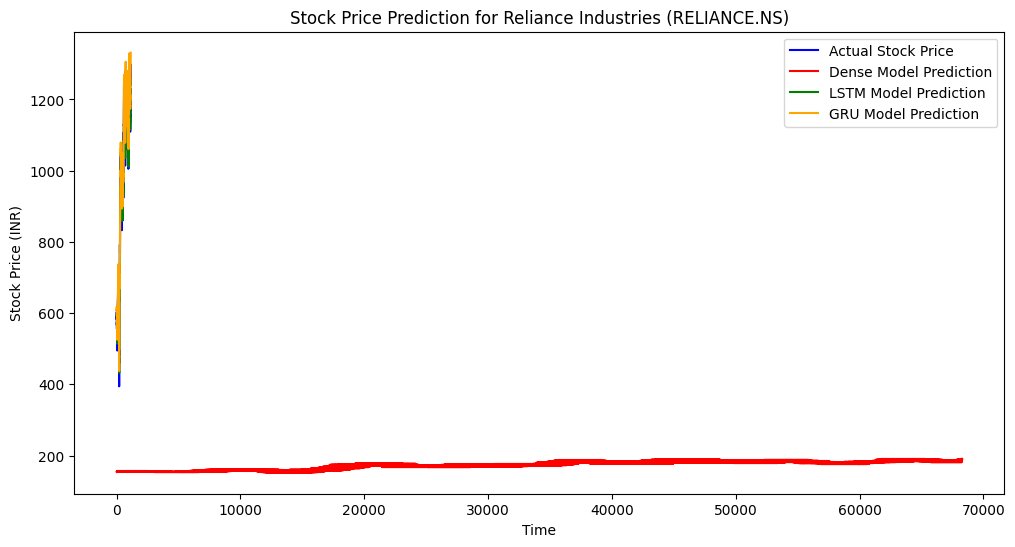

In [2]:
# Import necessary libraries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, GRU

# Step 1: Collect Historical Stock Data for Reliance Industries (RELIANCE.NS)
stock_symbol = 'RELIANCE.NS'  # Reliance Industries ticker on NSE
stock_data = yf.download(stock_symbol, start='2000-01-01', end='2024-01-01')

# Use only 'Close' price for prediction
stock_data = stock_data[['Close']]

# Step 2: Preprocessing the Data
# Normalize the data using Min-Max scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_data)

# Split the data into training and test sets (80% training, 20% testing)
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Step 3: Create Data Windows for Time-Series Prediction
def create_dataset(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i - window_size:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

window_size = 60  # Use past 60 days to predict next day's price
X_train, y_train = create_dataset(train_data, window_size)
X_test, y_test = create_dataset(test_data, window_size)

# Reshape data to 3D for LSTM/GRU input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Step 4: Build Neural Network Architectures

# a. Simple Dense Network
model_dense = Sequential()
model_dense.add(Dense(units=50, activation='relu', input_shape=(X_train.shape[1], 1)))
model_dense.add(Dropout(0.2))
model_dense.add(Dense(units=25, activation='relu'))
model_dense.add(Dense(units=1))

model_dense.compile(optimizer='adam', loss='mean_squared_error')

# b. LSTM Network
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=50, return_sequences=False))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(units=1))

model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# c. GRU Network
model_gru = Sequential()
model_gru.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_gru.add(Dropout(0.2))
model_gru.add(GRU(units=50, return_sequences=False))
model_gru.add(Dropout(0.2))
model_gru.add(Dense(units=1))

model_gru.compile(optimizer='adam', loss='mean_squared_error')

# Step 5: Train the Models

# Train Dense model
model_dense.fit(X_train, y_train, epochs=20, batch_size=32)

# Train LSTM model
model_lstm.fit(X_train, y_train, epochs=20, batch_size=32)

# Train GRU model
model_gru.fit(X_train, y_train, epochs=20, batch_size=32)

# Step 6: Evaluate the Models
mse_dense = model_dense.evaluate(X_test, y_test)
mse_lstm = model_lstm.evaluate(X_test, y_test)
mse_gru = model_gru.evaluate(X_test, y_test)

print(f"MSE for Dense model: {mse_dense}")
print(f"MSE for LSTM model: {mse_lstm}")
print(f"MSE for GRU model: {mse_gru}")

# Step 7: Make Predictions
predicted_dense = model_dense.predict(X_test)
predicted_lstm = model_lstm.predict(X_test)
predicted_gru = model_gru.predict(X_test)

# Reshape predictions to 2D for inverse scaling (for Dense model)
predicted_dense = predicted_dense.reshape(-1, 1)  # Reshape before inverse transform

# Inverse transform the predictions and actual values
predicted_dense = scaler.inverse_transform(predicted_dense)
predicted_lstm = scaler.inverse_transform(predicted_lstm)
predicted_gru = scaler.inverse_transform(predicted_gru)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Step 8: Visualize the Results
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, color='blue', label='Actual Stock Price')
plt.plot(predicted_dense, color='red', label='Dense Model Prediction')
plt.plot(predicted_lstm, color='green', label='LSTM Model Prediction')
plt.plot(predicted_gru, color='orange', label='GRU Model Prediction')
plt.title('Stock Price Prediction for Reliance Industries (RELIANCE.NS)')
plt.xlabel('Time')
plt.ylabel('Stock Price (INR)')
plt.legend()
plt.show()
